<a href="https://colab.research.google.com/github/wlin988/Colab/blob/master/GymRendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [3]:
!pip install pyglet==v1.3.2

     |████████████████████████████████| 1.0MB 6.3MB/s 
  Found existing installation: pyglet 1.4.6
    Uninstalling pyglet-1.4.6:
      Successfully uninstalled pyglet-1.4.6


In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [5]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

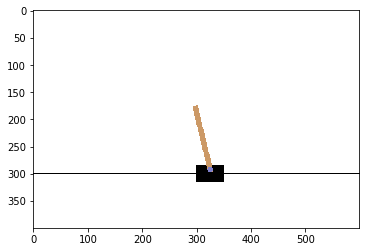

In [6]:


env = gym.make("CartPole-v1")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(99):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()


In [7]:
display.stop()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=0 stdout="" stderr="" timeout_happened=False>

In [8]:
!pip3 install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl

     |████████████████████████████████| 397.4MB 95.6MB/s 
ERROR: torchvision 0.4.1+cu100 has requirement torch==1.3.0, but you'll have torch 0.3.0.post4 which is incompatible.
ERROR: fastai 1.0.58 has requirement torch>=1.0.0, but you'll have torch 0.3.0.post4 which is incompatible.
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100


In [9]:
!pip3 install torchvision

     |████████████████████████████████| 773.1MB 23kB/s 
  Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4


In [10]:
#!conda install pytorch torchvision -c pytorch

/bin/bash: conda: command not found


In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [0]:
input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
num_epochs    = 8     # The number of times entire dataset is trained
batch_size    = 100   # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence

In [13]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:02, 4766912.82it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 134435.66it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2196100.22it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 51162.31it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [0]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [0]:
net = Net(input_size, hidden_size, num_classes)

In [0]:
use_cuda = True

In [0]:
if use_cuda and torch.cuda.is_available():
    net.cuda()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [20]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item())) #loss.data[0]


Epoch [1/8], Step [100/600], Loss: 0.3433
Epoch [1/8], Step [200/600], Loss: 0.2402
Epoch [1/8], Step [300/600], Loss: 0.3117
Epoch [1/8], Step [400/600], Loss: 0.1779
Epoch [1/8], Step [500/600], Loss: 0.2604
Epoch [1/8], Step [600/600], Loss: 0.0859
Epoch [2/8], Step [100/600], Loss: 0.1377
Epoch [2/8], Step [200/600], Loss: 0.1153
Epoch [2/8], Step [300/600], Loss: 0.1010
Epoch [2/8], Step [400/600], Loss: 0.1852
Epoch [2/8], Step [500/600], Loss: 0.0661
Epoch [2/8], Step [600/600], Loss: 0.0426
Epoch [3/8], Step [100/600], Loss: 0.0433
Epoch [3/8], Step [200/600], Loss: 0.0895
Epoch [3/8], Step [300/600], Loss: 0.0774
Epoch [3/8], Step [400/600], Loss: 0.0982
Epoch [3/8], Step [500/600], Loss: 0.1266
Epoch [3/8], Step [600/600], Loss: 0.0710
Epoch [4/8], Step [100/600], Loss: 0.0477
Epoch [4/8], Step [200/600], Loss: 0.0230
Epoch [4/8], Step [300/600], Loss: 0.0455
Epoch [4/8], Step [400/600], Loss: 0.0445
Epoch [4/8], Step [500/600], Loss: 0.0325
Epoch [4/8], Step [600/600], Loss:

In [21]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    
    if use_cuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    
    
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 97 %


In [0]:
torch.save(net.state_dict(), 'fnn_model_linwayne.pkl')

In [23]:
!git clone https://github.com/joosthub/PyTorchNLPBook.git

Cloning into 'PyTorchNLPBook'...
remote: Enumerating objects: 159, done.
remote: Total 159 (delta 0), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (159/159), 7.91 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [24]:
!git clone https://github.com/PacktPublishing/Machine-Learning-for-Finance.git

Cloning into 'Machine-Learning-for-Finance'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 121 (delta 2), reused 0 (delta 0), pack-reused 115
Receiving objects: 100% (121/121), 3.78 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [25]:
!pwd


/content


In [26]:
!ls


data			Machine-Learning-for-Finance  sample_data
fnn_model_linwayne.pkl	PyTorchNLPBook


In [0]:
!cd PyTorchNLPBook


In [28]:
!ls

data			Machine-Learning-for-Finance  sample_data
fnn_model_linwayne.pkl	PyTorchNLPBook


In [29]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [58]:
%cd PyTorchNLPBook

/content/PyTorchNLPBook


In [59]:
!ls


chapters  data	LICENSE  model_storage	README.md  requirements.txt  SETUP.md


In [60]:
%cd chapters/chapter_5
!ls -lta 

/content/PyTorchNLPBook/chapters/chapter_5
total 36
drwxr-xr-x 9 root root 4096 Oct 27 18:18 ..
drwxr-xr-x 5 root root 4096 Oct 27 18:18 .
drwxr-xr-x 4 root root 4096 Oct 27 18:18 5_3_doc_classification
drwxr-xr-x 2 root root 4096 Oct 27 18:18 data
-rw-r--r-- 1 root root 1935 Oct 27 18:18 README.md
drwxr-xr-x 4 root root 4096 Oct 27 18:18 5_2_CBOW
-rw-r--r-- 1 root root 9954 Oct 27 18:18 5_1_Pretrained_Embeddings.ipynb


In [61]:
%cd data
!ls

/content/PyTorchNLPBook/chapters/chapter_5/data
download.py  get-all-data.sh  README.md


In [62]:
!./get-all-data.sh

Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/yelp/raw_train.csv
12536it [00:06, 1821.61it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/yelp/raw_test.csv
848it [00:00, 1774.15it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/yelp/reviews_with_splits_lite.csv
1217it [00:00, 5833.88it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/surnames/surnames.csv
6it [00:00, 3761.71it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/surnames/surnames_with_splits.csv
8it [00:00, 3430.57it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/books/frankenstein.txt
14it [00:00, 3104.76it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/books/frankenstein_with_splits.csv
109it [00:00, 7471.71it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/ag_news/news.csv
188it [00:00, 508.87it/s]
Trying to fetch /content/PyTorchNLPBook/chapters/chapter_5/data/ag_news/n

In [69]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-10-27 18:56:21--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-27 18:56:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-27 18:56:22--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [77]:
%cd ../../
!pwd
!ls

/content/PyTorchNLPBook/chapters/chapter_5
/content/PyTorchNLPBook/chapters/chapter_5
5_1_Pretrained_Embeddings.ipynb  5_3_doc_classification  README.md
5_2_CBOW			 data


In [51]:
#!pip install annoy


     |████████████████████████████████| 645kB 6.6MB/s 
  Created wheel for annoy: filename=annoy-1.16.2-cp36-cp36m-linux_x86_64.whl size=310434 sha256=6022bdc3bca813426fac79619b281df652b6aae445706f0ae2bb9aec125abbd0
  Stored in directory: /root/.cache/pip/wheels/d3/d7/68/3795670ef4c6781fc10df0d6cf83b922244aa28cd9489d1176
Successfully built annoy


In [78]:
%run 5_1_Pretrained_Embeddings.ipynb 


Building Index!
Finished!
man : he :: woman : she
man : he :: woman : never
fly : plane :: sail : ship
fly : plane :: sail : vessel
cat : kitten :: dog : puppy
cat : kitten :: dog : toddler
cat : kitten :: dog : sleds
blue : color :: dog : cat
blue : color :: dog : animal
blue : color :: dog : breed
leg : legs :: hand : fingers
leg : legs :: hand : ears
leg : legs :: hand : stick
toe : foot :: finger : hand
toe : foot :: finger : attached
toe : foot :: finger : apart
talk : communicate :: read : instructions
talk : communicate :: read : communicating
talk : communicate :: read : transmit
blue : democrat :: red : republican
blue : democrat :: red : congressman
blue : democrat :: red : senator
man : king :: woman : queen
man : king :: woman : monarch
man : king :: woman : throne
man : doctor :: woman : nurse
man : doctor :: woman : physician
fast : fastest :: small : smallest
fast : fastest :: small : largest
fast : fastest :: small : among


In [74]:
%cd data/glove
!ls

/content/PyTorchNLPBook/chapters/chapter_5/data/glove
glove.6B.zip


In [75]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [76]:
!ls -lta

total 3039140
drwxr-xr-x 2 root root       4096 Oct 27 19:05 .
drwxr-xr-x 8 root root       4096 Oct 27 18:55 ..
-rw-r--r-- 1 root root  862182613 Oct 25  2015 glove.6B.zip
-rw-rw-r-- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw-rw-r-- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw-rw-r-- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
